In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

In [2]:
#LIFE EXPECTANCY
#Read annual working hours per worker on the world
WH_data = pd.read_csv('data/annual-working-hours-per-worker.csv')
WH_data.head()

,Entity,Code,Year,Average annual working hours per worker
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112


In [3]:
filt=(WH_data["Code"]=='USA')
WH_USA_df=WH_data[filt]
WH_USA_df.head()

,Entity,Code,Year,Average annual working hours per worker
3263,United States,USA,1870,3096.0
3264,United States,USA,1880,3044.0
3265,United States,USA,1890,2983.0
3266,United States,USA,1900,2938.0
3267,United States,USA,1913,2900.0


In [4]:
#Read life expectancy on the world
Unemp_data = pd.read_csv('data/unemployment-rate.csv')
Unemp_data.head()

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,12.031
1,Afghanistan,AFG,1992,10.645
2,Afghanistan,AFG,1993,12.368
3,Afghanistan,AFG,1994,12.299
4,Afghanistan,AFG,1995,8.702


In [6]:
filt=(Unemp_data["Code"]=='USA')
Unemp_USA_df=Unemp_data[filt]
Unemp_USA_df.head()

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
5967,United States,USA,1991,6.83
5968,United States,USA,1992,7.50
5969,United States,USA,1993,6.92
5970,United States,USA,1994,6.10
5971,United States,USA,1995,5.60


In [8]:
Unemp_USA_df.shape

(27, 4)

In [13]:
data_combined_df=pd.merge(WH_USA_df, Unemp_USA_df, how="outer", on="Year")
data_combined_df.dropna(inplace=True)
data_combined_df

,Entity_x,Code_x,Year,Average annual working hours per worker,Entity_y,Code_y,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
48,United States,USA,1991,1787.2532,United States,USA,6.83
49,United States,USA,1992,1775.0881,United States,USA,7.50
50,United States,USA,1993,1790.0741,United States,USA,6.92
51,United States,USA,1994,1807.9658,United States,USA,6.10
52,United States,USA,1995,1817.5757,United States,USA,5.60
53,United States,USA,1996,1823.6223,United States,USA,5.40
54,United States,USA,1997,1828.6818,United States,USA,4.94
55,United States,USA,1998,1839.5144,United States,USA,4.51
56,United States,USA,1999,1841.6412,United States,USA,4.22
57,United States,USA,2000,1844.9187,United States,USA,3.99


In [14]:
data_combined_df.drop(['Entity_y', 'Code_y'], axis=1, inplace=True)
data_combined_df.rename(columns = {'Entity_x':'Country', 'Code_x':'Country Code', 'Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployment Rate'}, inplace = True) 
data_combined_df.head()

,Country,Country Code,Year,Average annual working hours per worker,Unemployment Rate
48,United States,USA,1991,1787.2532,6.83
49,United States,USA,1992,1775.0881,7.50
50,United States,USA,1993,1790.0741,6.92
51,United States,USA,1994,1807.9658,6.10
52,United States,USA,1995,1817.5757,5.60


In [15]:
years=data_combined_df['Year']
work_hours=data_combined_df['Average annual working hours per worker']
unemployment=data_combined_df['Unemployment Rate']

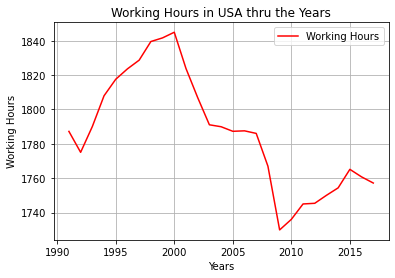

In [16]:
plt.title("Working Hours in USA thru the Years")
plt.ylabel("Working Hours")
plt.xlabel("Years")
plt.plot(years,work_hours, color='red', label="Working Hours")
plt.legend(loc="upper right")
plt.grid()

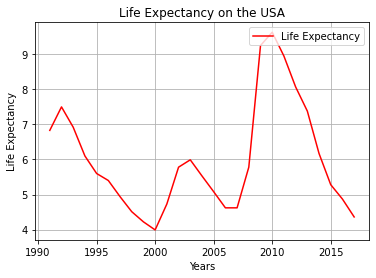

In [17]:

plt.title("Life Expectancy on the USA")
plt.ylabel("Life Expectancy")
plt.xlabel("Years")
plt.plot(years,unemployment, color='red', label="Life Expectancy")
plt.legend(loc="upper right")
plt.grid()